# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучим данные

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats as st
import os


sns.set(rc={'figure.figsize':(17,8)}) #Зададим размер фигур построеных с помощью seaborn
np.set_printoptions(threshold=np.inf)
sns.set_palette('dark')
pd.set_option('display.max_columns', None) #Уберем ограничение на максимальное число отображаемых столбцов за раз

In [4]:
pth1_1 = 'calls.csv'
pth1_2 = 'internet.csv'
pth1_3 = 'messages.csv'
pth1_4 = 'tariffs.csv'
pth1_5 = 'users.csv'
pth2_1 = '/datasets/calls.csv'
pth2_2 = '/datasets/internet.csv'
pth2_3 = '/datasets/messages.csv'
pth2_4 = '/datasets/tariffs.csv'
pth2_5 = '/datasets/users.csv'

if os.path.exists(pth1_1):
    calls = pd.read_csv(pth1_1)
    internet = pd.read_csv(pth1_2)
    messages = pd.read_csv(pth1_3)
    tariffs = pd.read_csv(pth1_4)
    users = pd.read_csv(pth1_5)
elif os.path.exists(pth2):
    calls = pd.read_csv(pth2_1)
    internet = pd.read_csv(pth2_2)
    messages = pd.read_csv(pth2_3)
    tariffs = pd.read_csv(pth2_4)
    users = pd.read_csv(pth2_5)
else:
    print('Что-то пошло не так')

Для начала нужно ознакомиться с файлами, что лежит в датасетах, какие типы данных.

In [5]:
display(calls.head(10))
calls.info()

display(internet.head(10))
internet.info()

display(messages.head(10))
messages.info()

display(tariffs.head(10))
tariffs.info()

display(users.head(10))
users.info()


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Ознакомившись с таблицами, мы можем сделать вывод, что ключом для объединения таблиц может выступать столбец `user_id`, так как он указан в одном формате.

Так как задача - анализ пользователей, если в других таблицах есть пользователи, которых нет в таблице с пользователями, мы можем ими принибречь, а значит нужно сделать объединение, по ключу `user_id` из таблицы `users`.

Однако нам нет смысла объединять все таблицы в одну, так как многие данные уникальны для своей таблицы и работать с ними будет неудобно. Создадим `3` таблицы 
- Пользователи-Звонки (Users_Calls)
- Пользователи-Интернет (Users_Internet)
- Пользователи-Сообщения (Users_Messages)

In [6]:
users_calls = users.join(calls.set_index('user_id'), on='user_id').reset_index(drop=True) #Объединим таблицы по ключу user_id и обновим индексы
users_internet = users.join(internet.set_index('user_id'), on='user_id').reset_index(drop=True) #Объединим таблицы по ключу user_id и обновим индексы
users_messages = users.join(messages.set_index('user_id'), on='user_id').reset_index(drop=True) #Объединим таблицы по ключу user_id и обновим индексы
display(users_calls)
display(users_internet)
display(users_messages)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,call_date,duration
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-07-25,0.00
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-08-17,0.00
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-06-11,2.85
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-09-21,13.80
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-15,5.18
...,...,...,...,...,...,...,...,...,...,...,...
202610,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_215,2018-12-26,0.76
202611,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_216,2018-10-18,18.83
202612,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_217,2018-11-10,10.81
202613,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_218,2018-10-06,4.27


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,Unnamed: 0,id,mb_used,session_date
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1000_0,112.95,2018-11-25
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1.0,1000_1,1052.81,2018-09-07
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2.0,1000_2,1197.26,2018-06-25
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0,1000_3,550.27,2018-08-22
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,4.0,1000_4,302.56,2018-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...
149394,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,149391.0,1499_152,318.90,2018-10-03
149395,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,149392.0,1499_153,490.13,2018-12-14
149396,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,149393.0,1499_154,0.00,2018-10-27
149397,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,149394.0,1499_155,1246.32,2018-11-26


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,message_date
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-06-27
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-10-08
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-08-04
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-06-16
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-05
...,...,...,...,...,...,...,...,...,...,...
123105,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_179,2018-12-12
123106,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_180,2018-09-28
123107,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_181,2018-09-27
123108,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_182,2018-11-15


Построим гистограмму распределения интернет сессий

<AxesSubplot:>

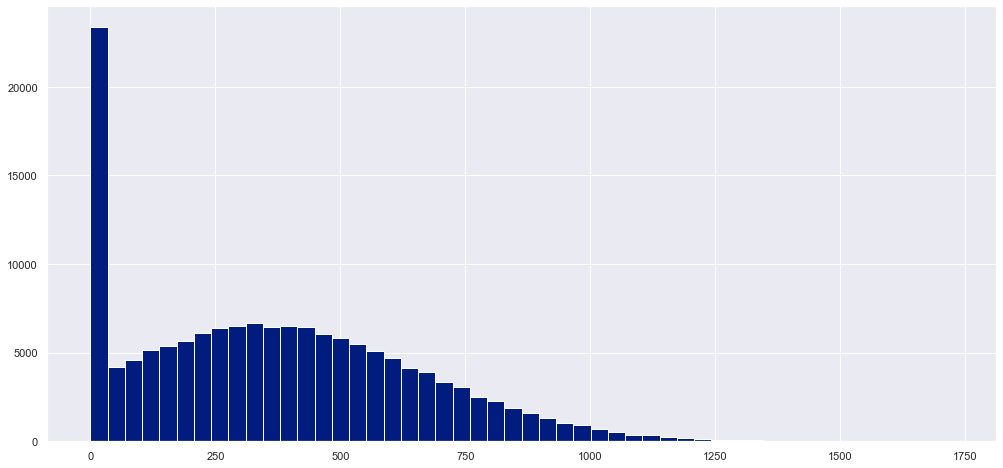

In [8]:
users_internet['mb_used'].hist(bins=50)

In [6]:
display(users_internet.loc[users_internet['mb_used'] == 0])

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,Unnamed: 0,id,mb_used,session_date
11,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,1000_11,0.0,2018-08-28
38,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,38.0,1000_38,0.0,2018-11-27
46,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,46.0,1000_46,0.0,2018-06-30
67,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,67.0,1000_67,0.0,2018-06-16
72,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,72.0,1000_72,0.0,2018-06-15
...,...,...,...,...,...,...,...,...,...,...,...,...
149383,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,149380.0,1499_141,0.0,2018-12-11
149384,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,149381.0,1499_142,0.0,2018-11-01
149386,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,149383.0,1499_144,0.0,2018-11-27
149389,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,149386.0,1499_147,0.0,2018-10-21


Мы можем увидеть большое количество нулей в объеме трафика. Как в дальнейшем при анализе мы не используем количество сессий, можно говорить о том, что данные строки нам не нужны. Однако более 10% процента 0 это не нормально. Возможно лучше обратиться к тем кто выгрузил базу для разъяснения. 
А в дальнейшем при суммировании трафика по месяцам, данные строки уйдут сами собой.

Удалим явные дубликаты 

In [9]:
print(f'До удаления дубликатов в users_calls: {len(users_calls)}')
users_calls = users_calls.drop_duplicates().reset_index(drop=True)
print(f'После удаления дубликатов: {len(users_calls)}')

print(f'До удаления дубликатов в users_messages: {len(users_messages)}')
users_messages = users_messages.drop_duplicates().reset_index(drop=True)
print(f'После удаления дубликатов: {len(users_messages)}')

print(f'До удаления дубликатов в users_internet: {len(users_internet)}')
users_internet = users_internet.drop_duplicates().reset_index(drop=True)
print(f'После удаления дубликатов: {len(users_internet)}')

До удаления дубликатов в users_calls: 202615
После удаления дубликатов: 202615
До удаления дубликатов в users_messages: 123110
После удаления дубликатов: 123110
До удаления дубликатов в users_internet: 149399
После удаления дубликатов: 149399


### Вывод 
Просмотрев таблицы, мы можем точно сказать, что не все данные нам нужны для анализа. Например мы точно можем убрать:
- Имена пользователей (`first_name`, `last_name`) и возраст (`age`), так как это не дает нам никакой информации необходимой для исследования, а идентификацию мы сможем проводить через `user_id`.
- Уникальный идентификатор сессии (`id`) - он не требуется для задач
- Дату регистрации (`reg_date`) - она не треубется для задач
- Дату расторжения договора (`churn_date`) - она не требуется для задач

In [10]:
users_calls = users_calls.drop(columns=['age','churn_date','first_name','reg_date','last_name','id']) #Удалим стобцы
users_internet = users_internet.drop(columns=['age','churn_date','first_name','reg_date','last_name','id','Unnamed: 0']) #Удалим стобцы
users_messages = users_messages.drop(columns=['age','churn_date','first_name','reg_date','last_name','id']) #Удалим стобцы

## Предобработка данных

### Users_calls

Теперь нужно детально изучить каждую таблицу, изменить типы, обработать дубликаты и NaN.

Начнем с `users_calls`

In [11]:
print(users_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202615 entries, 0 to 202614
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    202615 non-null  int64  
 1   city       202615 non-null  object 
 2   tariff     202615 non-null  object 
 3   call_date  202607 non-null  object 
 4   duration   202607 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.7+ MB
None


- `call_date` имеет неверный тип, нужно привести к DateTime.
- `tariff` нужно проверить уникальные значения
- `duration` - необходимо округлить значения в соотвествии с правилами компании и привести к int
- `city` - нужно проверить уникальные значения     

Для начала изучим пропуски. Судя по `info` пропуски есть в `call_date` и `duration`

In [12]:
display(users_calls.loc[users_calls['call_date'].isna()]) #Отобразим все пропуски в значениях 

,user_id,city,tariff,call_date,duration
36344,1091,Набережные Челны,ultra,NaN,NaN
42758,1106,Калуга,ultra,NaN,NaN
51654,1128,Волжский,ultra,NaN,NaN
92592,1231,Чебоксары,ultra,NaN,NaN
127924,1328,Мурманск,ultra,NaN,NaN
145827,1371,Омск,smart,NaN,NaN
193093,1473,Красноярск,ultra,NaN,NaN
198661,1489,Санкт-Петербург,smart,NaN,NaN


Пропуски можно удалить, так как они нам ничего не дадут, мы не знаем длительность звонка. Возможно это были ложные срабатывания базовой станции

In [13]:
users_calls = users_calls.dropna(subset=['call_date']) #Удалим пропуски
print(users_calls['city'].unique()) #Отобразим уникальные значения
print(users_calls['tariff'].unique()) #Отобразим уникальные значения

['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 'Воронеж' 'Курган' 'Барнаул' 'Красноярск' 'Архангельск' 'Липецк'
 'Кемерово' 'Киров' 'Сургут' 'Пенза' 'Волжский' 'Магнитогорск'
 'Нижний Новгород' 'Кострома' 'Владивосток' 'Тамбов' 'Балашиха'
 'Севастополь' 'Калининград' 'Оренбург' 'Смоленск' 'Нижневартовск'
 'Владимир' 'Новороссийск' 'Грозный' 'Подольск']
['ultra' 'smart']


Проблем с дубликатами нет.

In [14]:
users_calls['duration'] = np.ceil(users_calls['duration']).astype('int64') #Округлим значение звонка вверх и уберем дробную часть
users_calls['call_date'] = pd.to_datetime(users_calls['call_date'], format='%Y%m%dT') #Приведем дату к нужному типу
users_calls['call_month'] = users_calls['call_date'].dt.month_name() #Создадим столбец с названиями месяцевв

display(users_calls)
display(users_calls.info())

,user_id,city,tariff,call_date,duration,call_month
0,1000,Краснодар,ultra,2018-07-25,0,July
1,1000,Краснодар,ultra,2018-08-17,0,August
2,1000,Краснодар,ultra,2018-06-11,3,June
3,1000,Краснодар,ultra,2018-09-21,14,September
4,1000,Краснодар,ultra,2018-12-15,6,December
...,...,...,...,...,...,...
202610,1499,Пермь,smart,2018-12-26,1,December
202611,1499,Пермь,smart,2018-10-18,19,October
202612,1499,Пермь,smart,2018-11-10,11,November
202613,1499,Пермь,smart,2018-10-06,5,October


<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202614
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     202607 non-null  int64         
 1   city        202607 non-null  object        
 2   tariff      202607 non-null  object        
 3   call_date   202607 non-null  datetime64[ns]
 4   duration    202607 non-null  int64         
 5   call_month  202607 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 10.8+ MB


None

Таблица готова к обработке.

### Users_internet

Изучим `users_internet`

In [15]:
print(users_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149399 entries, 0 to 149398
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       149399 non-null  int64  
 1   city          149399 non-null  object 
 2   tariff        149399 non-null  object 
 3   mb_used       149396 non-null  float64
 4   session_date  149396 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.7+ MB
None


Как мы видим, есть попуски в `mb_used` и `session_date`

- `session_date` имеет неверный тип, нужно привести к DateTime.

Для начала изучим пропуски. Судя по `info` пропуски есть в `mb_used` и `session_date`

In [16]:
display(users_internet.loc[users_internet['mb_used'].isna()]) #Отобразим пропуски

,user_id,city,tariff,mb_used,session_date
37050,1128,Волжский,ultra,NaN,NaN
80796,1273,Курган,ultra,NaN,NaN
108634,1371,Омск,smart,NaN,NaN


Так же как и в предыдущей таблице, пропуски нам ничего не дадут, возможно ошибка базовой станции. Их можно удалять

In [17]:
users_internet = users_internet.dropna(subset=['mb_used']) #Удалим пропуски

In [18]:
users_internet['session_date'] = pd.to_datetime(users_internet['session_date'], format='%Y%m%dT') #Изменим тип даты на корректный
users_internet['session_month'] = users_internet['session_date'].dt.month_name() #Выделим название месяцев в дате
display(users_internet)
display(users_internet.info())

,user_id,city,tariff,mb_used,session_date,session_month
0,1000,Краснодар,ultra,112.95,2018-11-25,November
1,1000,Краснодар,ultra,1052.81,2018-09-07,September
2,1000,Краснодар,ultra,1197.26,2018-06-25,June
3,1000,Краснодар,ultra,550.27,2018-08-22,August
4,1000,Краснодар,ultra,302.56,2018-09-24,September
...,...,...,...,...,...,...
149394,1499,Пермь,smart,318.90,2018-10-03,October
149395,1499,Пермь,smart,490.13,2018-12-14,December
149396,1499,Пермь,smart,0.00,2018-10-27,October
149397,1499,Пермь,smart,1246.32,2018-11-26,November


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149398
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        149396 non-null  int64         
 1   city           149396 non-null  object        
 2   tariff         149396 non-null  object        
 3   mb_used        149396 non-null  float64       
 4   session_date   149396 non-null  datetime64[ns]
 5   session_month  149396 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 8.0+ MB


None

Таблица готова к обработке.

### Users_messages

Изучим `users_internet`

In [19]:
print(users_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123110 entries, 0 to 123109
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       123110 non-null  int64 
 1   city          123110 non-null  object
 2   tariff        123110 non-null  object
 3   message_date  123036 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.8+ MB
None


Как мы видим, есть попуски в `message_date`. Так как их немного лучше не учитывать данные сообщения при анализе данных, так как не может сказать самое важно, дату их отправки

- `message_date` имеет неверный тип, нужно привести к DateTime.

In [20]:
users_messages = users_messages.dropna(subset=['message_date']) #Удалим отсуствующие даты
users_messages['message_date'] = pd.to_datetime(users_messages['message_date'], format='%Y%m%dT') #Изменим тип даты
users_messages['message_month'] = users_messages['message_date'].dt.month_name() #Добавим столбец с названием месяца в дате
display(users_messages)
display(users_messages.info())

,user_id,city,tariff,message_date,message_month
0,1000,Краснодар,ultra,2018-06-27,June
1,1000,Краснодар,ultra,2018-10-08,October
2,1000,Краснодар,ultra,2018-08-04,August
3,1000,Краснодар,ultra,2018-06-16,June
4,1000,Краснодар,ultra,2018-12-05,December
...,...,...,...,...,...
123105,1499,Пермь,smart,2018-12-12,December
123106,1499,Пермь,smart,2018-09-28,September
123107,1499,Пермь,smart,2018-09-27,September
123108,1499,Пермь,smart,2018-11-15,November


<class 'pandas.core.frame.DataFrame'>
Int64Index: 123036 entries, 0 to 123109
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        123036 non-null  int64         
 1   city           123036 non-null  object        
 2   tariff         123036 non-null  object        
 3   message_date   123036 non-null  datetime64[ns]
 4   message_month  123036 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 5.6+ MB


None

Таблица готова к обработке.

### Вывод

Мы привели столбцы к одному типу, убрали отсутствущие значения и теперь можем начать объеденение таблиц и их группировку.

## Подготовка таблиц по пользователю

Для дальнейшего анализа нам не нужны точные даты, мы объединим таблицы по пользователю и по месяцу и оставим тариф у каждого пользователя, это нужно для дальнейшего анализа

In [21]:
users_calls_pivot = users_calls.groupby(['user_id','call_month','tariff']).sum() #Сгруппируем и расчитаем сумму по месяцу
users_internet_pivot = users_internet.groupby(['user_id','session_month','tariff']).sum() #Сгруппируем и расчитаем сумму по месяцу
users_messages_pivot = users_messages.groupby(['user_id','message_month','tariff']).count().drop(columns=['city']) #Сгруппируем и расчитаем сумму по месяцу

display(users_calls_pivot)
display(users_internet_pivot)
display(users_messages_pivot)

duration
user_id call_month tariff          
1000    August     ultra        408
        December   ultra        333
        July       ultra        340
        June       ultra        172
        May        ultra        159
...                             ...
1498    September  smart        471
1499    December   smart        492
        November   smart        612
        October    smart        449
        September  smart         70

[3174 rows x 1 columns]

mb_used
user_id session_month tariff          
1000    August        ultra   14055.93
        December      ultra    9817.61
        July          ultra   14003.64
        June          ultra   23233.77
        May           ultra    2253.49
...                                ...
1498    September     smart   22134.41
1499    December      smart   13055.58
        November      smart   17963.31
        October       smart   17788.51
        September     smart    1845.75

[3203 rows x 1 columns]

message_date
user_id message_month tariff              
1000    August        ultra             81
        December      ultra             70
        July          ultra             75
        June          ultra             60
        May           ultra             22
...                                    ...
1498    September     smart             44
1499    December      smart             66
        November      smart             59
        October       smart             48
        September     smart             11

[2717 rows x 1 columns]

Группировка проведена успешно.
Теперь создадим результирующую таблицу.

In [22]:
final_pivot = users_internet_pivot.join(users_messages_pivot, on=['user_id','session_month','tariff'], how='outer') #Объединим таблицы
final_pivot = final_pivot.join(users_calls_pivot, on=['user_id','session_month','tariff'], how='outer')  #Объединим таблицы
final_pivot['mb_used'] = np.ceil((final_pivot['mb_used'] / 1024))  #Вместо мб округлим до гб по правилам компании
final_pivot = final_pivot.fillna(0).rename(
    columns={'mb_used':'gb_used','message_date':'message_by_month','duration':'sum_duration'}
)  #Переименуем столбцы для удобства работы с ними
display(final_pivot)  

gb_used  message_by_month  sum_duration
user_id session_month tariff                                         
1000    August        ultra      14.0              81.0         408.0
        December      ultra      10.0              70.0         333.0
        July          ultra      14.0              75.0         340.0
        June          ultra      23.0              60.0         172.0
        May           ultra       3.0              22.0         159.0
...                               ...               ...           ...
1273    October       ultra       0.0              35.0         315.0
        September     ultra       0.0              32.0         223.0
1377    February      ultra       0.0               2.0         179.0
1392    February      ultra       0.0               3.0          13.0
1446    August        smart       0.0               1.0          50.0

[3214 rows x 3 columns]

Финальная таблица успешно создана. Теперь необходимо подсчитать сколько пользователь заплатил в каждый месяц использования.
Для этого нам необходимо использовать таблицу с тарифами, однако там указаны мегабайты, вместо гигабайтов. Для удобства изменим единицы измерения.

In [23]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024 #Переведем мегабайты в гигабайты
tariffs = tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'}) #Изменим название стобца
display(tariffs)

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


Все изменения успешно проведены. Теперь расчитаем доход.

In [24]:
final_pivot = final_pivot.reset_index(level='tariff') #Подготовим индекс тариф к работе
def user_income(user_tariff, gb, messages, duration): #Создадим функцию для расчета доходности
    tariff_limits = tariffs.loc[tariffs['tariff_name'] == user_tariff] #Из таблицы с тарифами достанем строку с нужным тарифом
    income_internet = (gb - tariff_limits['gb_per_month_included']) * tariff_limits['rub_per_gb'] #Расчитаем доход за перерасход интернета
    income_internet = income_internet.where(income_internet >= 0, other=0) #Если перерасхода нет, что значение доходности будет отрицательным, приведем его к 0
    income_messages = (messages - tariff_limits['messages_included']) * tariff_limits['rub_per_message'] #Расчитаем доход за перерасход смс
    income_messages = income_messages.where(income_messages >= 0, other=0) #Если перерасхода нет, что значение доходности будет отрицательным, приведем его к 0
    income_duration = (duration - tariff_limits['minutes_included']) * tariff_limits['rub_per_minute'] #Расчитаем доход за перерасход минут
    income_duration = income_duration.where(income_duration >= 0, other=0) #Если перерасхода нет, что значение доходности будет отрицательным, приведем его к 0
    total_income = (income_internet + income_messages + income_duration + tariff_limits['rub_monthly_fee']).reset_index(drop=True) #Расчитаем финальный доход 
    return total_income[0] #Так как по итогам мы получаем series нужно вытащить оттуда нужное нам значение в формате, который мы можем внести в таблицу
final_pivot['income'] = final_pivot.apply(lambda x : user_income(x.tariff, x.gb_used, x.message_by_month, x.sum_duration),axis = 1) #Применим ф-цию на каждую строку таблицы
display(final_pivot)

tariff  gb_used  message_by_month  sum_duration  income
user_id session_month                                                        
1000    August         ultra     14.0              81.0         408.0  1950.0
        December       ultra     10.0              70.0         333.0  1950.0
        July           ultra     14.0              75.0         340.0  1950.0
        June           ultra     23.0              60.0         172.0  1950.0
        May            ultra      3.0              22.0         159.0  1950.0
...                      ...      ...               ...           ...     ...
1273    October        ultra      0.0              35.0         315.0  1950.0
        September      ultra      0.0              32.0         223.0  1950.0
1377    February       ultra      0.0               2.0         179.0  1950.0
1392    February       ultra      0.0               3.0          13.0  1950.0
1446    August         smart      0.0               1.0          50.0   550.0

[3214 rows x 5 columns]

Доход расчитан успешно

### Вывод

Мы расчитали ежемесячную доходность по каждому пользователю и подготовили таблицу для дальнейшего разделения на две группы. 
С тарифом Smart и с тарифом Ultra. 

## Подготовка таблицы по каждому тарифу

Для начала нам нужно убрать id пользователей, так как они нам больше не нужны.
После этого выделить под каждый тариф свою таблицу и объединить значения по месяцам высчитав среднее.

In [28]:
pivot_smart = final_pivot.loc[final_pivot['tariff'] == 'smart'].reset_index().drop(columns='user_id') #Выделим тариф Смарт в отдельную таблицу
pivot_ultra = final_pivot.loc[final_pivot['tariff'] == 'ultra'].reset_index().drop(columns='user_id') #Выделим тариф Ультра в отдельную таблицу
pivot_ultra_by_month = pivot_ultra.groupby('session_month').mean() #Сгруппируем по месяцу и расчитаем среднее
display(pivot_ultra_by_month)

,gb_used,message_by_month,sum_duration,income
session_month,,,,
April,16.963636,31.563636,458.018182,2001.818182
August,19.598131,48.439252,510.775701,2083.177570
December,21.741007,60.611511,592.805755,2138.848921
February,12.000000,21.958333,297.125000,1975.000000
January,13.222222,33.777778,428.111111,1950.000000
July,20.505495,49.846154,545.791209,2118.131868
June,18.940476,41.726190,479.702381,2039.285714
March,17.648649,32.297297,489.648649,2014.864865
May,19.373134,37.850746,510.328358,2059.701493


In [29]:
display(pivot_smart)

,session_month,tariff,gb_used,message_by_month,sum_duration,income
0,December,smart,14.0,0.0,414.0,550.0
1,November,smart,18.0,0.0,430.0,1150.0
2,August,smart,20.0,13.0,289.0,1550.0
3,December,smart,18.0,12.0,236.0,1150.0
4,July,smart,18.0,11.0,214.0,1150.0
...,...,...,...,...,...,...
2224,December,smart,13.0,66.0,492.0,598.0
2225,November,smart,18.0,59.0,612.0,1513.0
2226,October,smart,18.0,48.0,449.0,1150.0
2227,September,smart,2.0,11.0,70.0,550.0


In [30]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
pivot_smart_by_month = pivot_smart.groupby('session_month').mean() #Сгруппируем по месяцу и расчитаем среднее
pivot_smart_by_month.index = pd.Categorical(pivot_smart_by_month.index, categories=months, ordered=True) #В индексе сделаем категоральное значение в определенным порядком
pivot_smart_by_month = pivot_smart_by_month.sort_index() #Отсортируем индекс
display(pivot_smart_by_month)
pivot_ultra_by_month = pivot_ultra.groupby('session_month').mean() #Сгруппируем по месяцу и расчитаем среднее
pivot_ultra_by_month.index = pd.Categorical(pivot_ultra_by_month.index, categories=months, ordered=True) #В индексе сделаем категоральное значение в определенным порядком
pivot_ultra_by_month = pivot_ultra_by_month.sort_index() #Отсортируем индекс
display(pivot_ultra_by_month)

,gb_used,message_by_month,sum_duration,income
January,8.735294,18.235294,203.852941,721.323529
February,11.844828,24.086207,298.689655,827.603448
March,15.233766,31.857143,390.051948,1164.623377
April,13.625000,30.741071,367.133929,963.089286
May,15.907801,33.773050,387.361702,1197.510638
June,15.951220,33.402439,395.640244,1204.018293
July,15.875622,33.751244,408.353234,1223.950249
August,16.736170,33.638298,421.468085,1320.595745
September,16.392308,33.638462,428.611538,1249.946154
October,16.880952,33.765306,426.136054,1364.853741


,gb_used,message_by_month,sum_duration,income
January,13.222222,33.777778,428.111111,1950.000000
February,12.000000,21.958333,297.125000,1975.000000
March,17.648649,32.297297,489.648649,2014.864865
April,16.963636,31.563636,458.018182,2001.818182
May,19.373134,37.850746,510.328358,2059.701493
June,18.940476,41.726190,479.702381,2039.285714
July,20.505495,49.846154,545.791209,2118.131868
August,19.598131,48.439252,510.775701,2083.177570
September,19.243478,52.286957,539.443478,2024.347826
October,20.065041,58.430894,558.081301,2065.853659


### Тариф Смарт активность пользователей по месяцам

Теперь мы можем говорить, сколько в среднем тафика, минут разговора и смс тратит пользователь в месяц. 
Однако для удобства нужно визуализировать эти значения

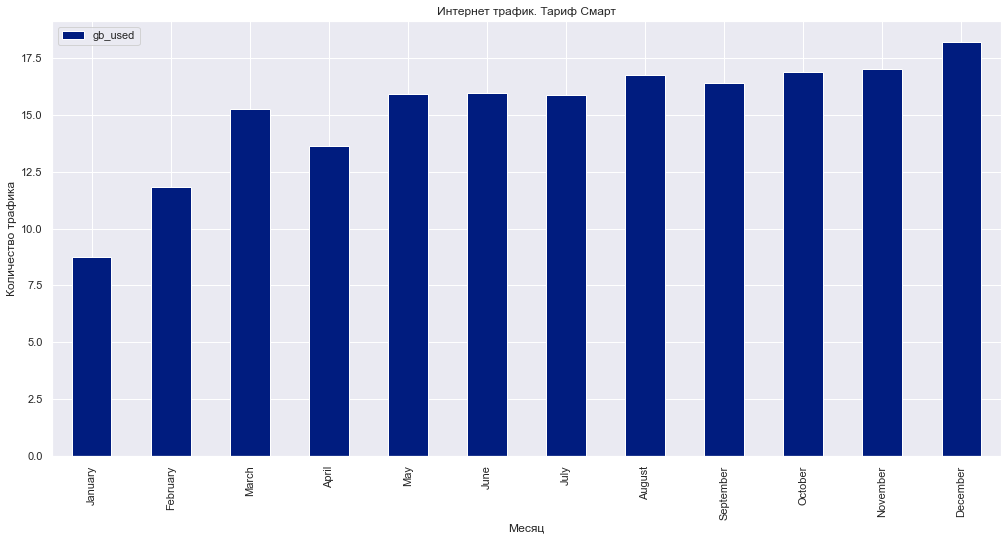

In [32]:
pivot_smart_by_month.plot.bar(y='gb_used',title='Интернет трафик. Тариф Смарт', grid=True) #Построим столбчатую диаграмму
plt.xlabel('Месяц')
plt.ylabel('Количество трафика')
plt.show()

Пользователь тарифа смарт тратит меньше всего трафика всего в январе, а больше всего в декабре.

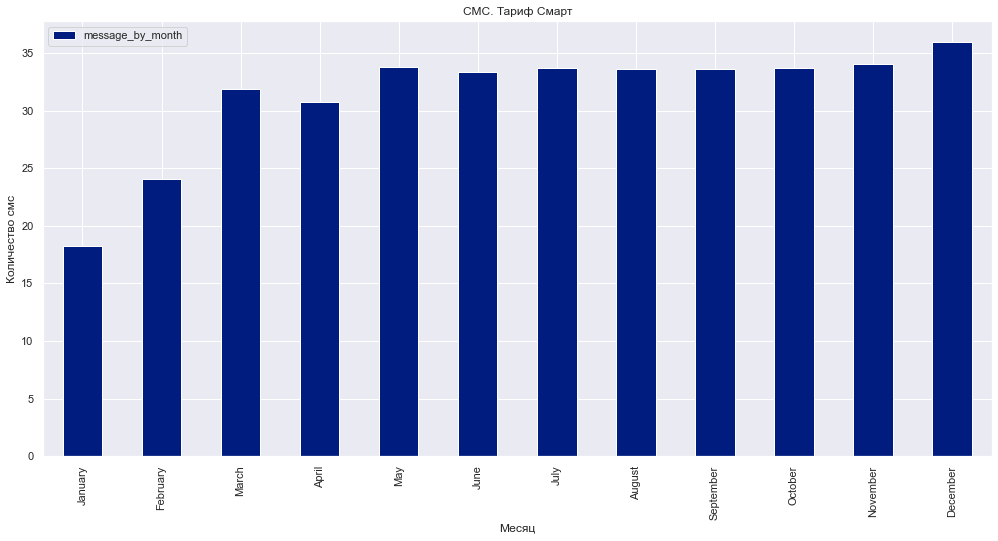

In [34]:
pivot_smart_by_month.plot.bar(y='message_by_month',title='СМС. Тариф Смарт', grid=True) #Построим столбчатую диаграмму
plt.xlabel('Месяц')
plt.ylabel('Количество смс')
plt.show()

Самый большой расход смс в тарифе смарт в декабре, а наименьший в январе.

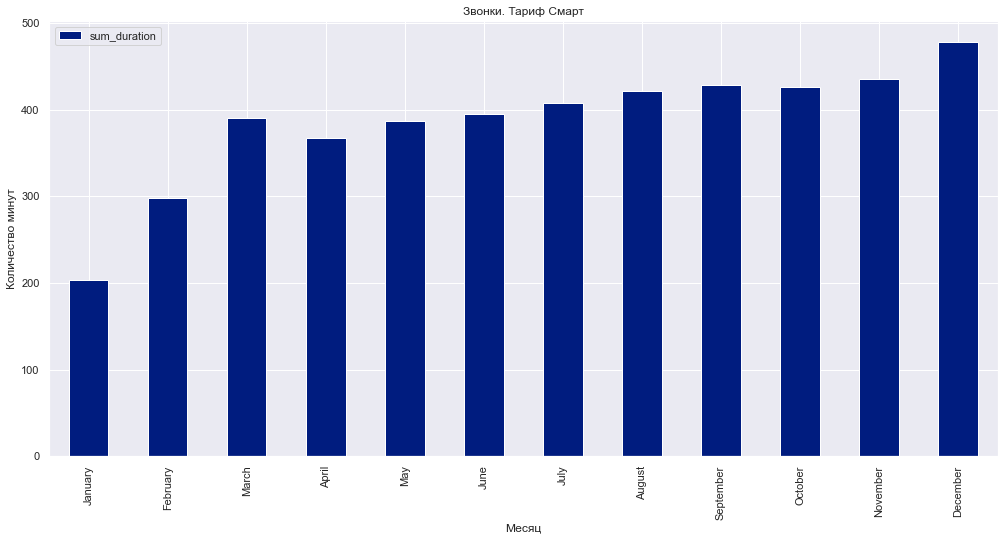

In [36]:
pivot_smart_by_month.plot.bar(y='sum_duration',title='Звонки. Тариф Смарт', grid=True)#Построим столбчатую диаграмму
plt.xlabel('Месяц')
plt.ylabel('Количество минут')
plt.show()

Больше всего звонят в декабре, а меньше всего в январе.

#### Вывод

Наибольшая активность пользователя тарифа смарт в декабре, что логично, так как ищутся подарки, места для празднования, ищутся видеорецепты, множество звонков и смс в которых люди планируют то, как будут проводить новый год и январские праздники.

Наименьшая активность в январе. Это связанно с тем, что люди отдыхают от посленовогодней суеты, чаще общаются в живую на праздниках. Деловая активность в январе так же снижена. Февраль так же месяц слабый по активности, это связано с тем, что активность пользователей только начинает восстанавливаться после января. 

### Тариф Ультра активность пользователей по месяцам

<AxesSubplot:title={'center':'Интернет трафик. Тариф Ультра'}>

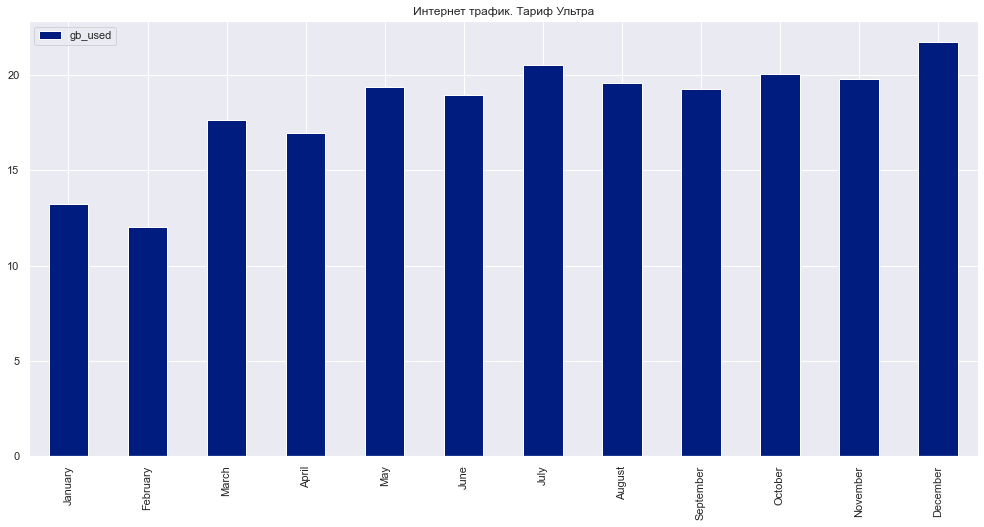

In [37]:
pivot_ultra_by_month.plot.bar(y='gb_used',title='Интернет трафик. Тариф Ультра', grid=True) #Построим столбчатую диаграмму
plt.xlabel('Месяц')
plt.ylabel('Количество трафика')
plt.show()

Наименьший расход трафика в феврале и январе, а наибольший в декабре.

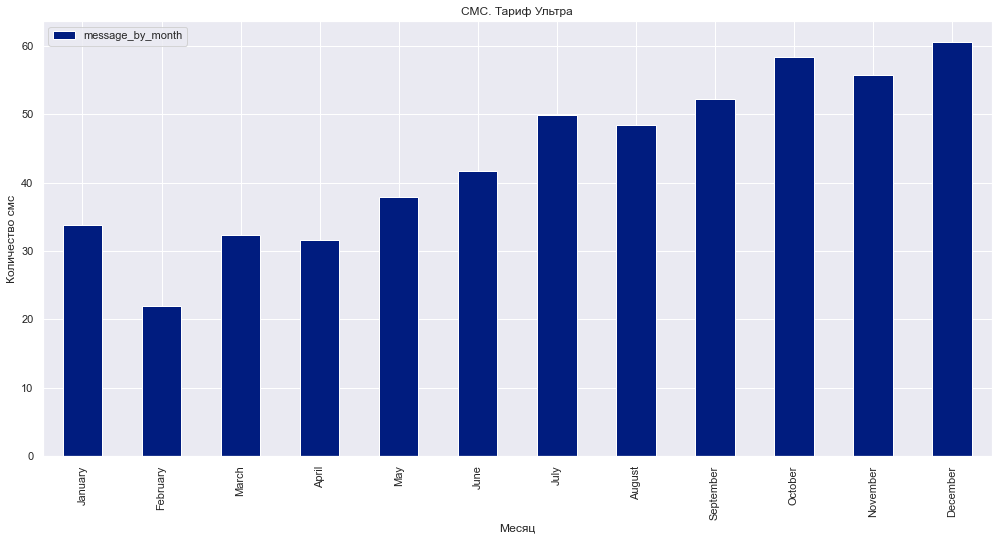

In [38]:
pivot_ultra_by_month.plot.bar(y='message_by_month',title='СМС. Тариф Ультра', grid=True) #Построим столбчатую диаграмму
plt.xlabel('Месяц')
plt.ylabel('Количество смс')
plt.show()

Наименьший расход смс в феврале, а наибольший в декабре.

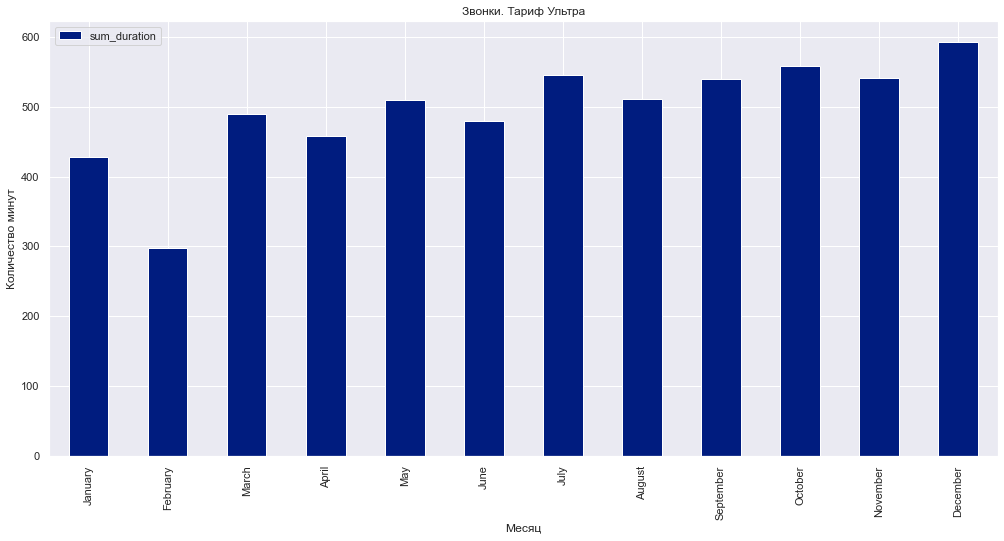

In [39]:
pivot_ultra_by_month.plot.bar(y='sum_duration',title='Звонки. Тариф Ультра', grid=True) #Построим столбчатую диаграмму
plt.xlabel('Месяц')
plt.ylabel('Количество минут')
plt.show()

Наименьший расход минут в феврале, а наибольший в декабре.

#### Вывод

Мы можем сделать вывод, что наименьшая активность пользователей тарифа Ультра в феврале, а наибольшая в декабре.
Как было сказано для тарифа смарт, повышенная активность декабря связанна с предновогодней суетой, планированием, подбором подарков, повышенной деловой активностью.

Однако как можно заметить, различие с тарифом смарт состоит в том, что у пользователей ультра большее падение наблюдается в феврале, а не январе.
Необходимо поднимать ЦА по тарифам, чтобы сделать правильный вывод касательно данного факта.

### Тарифы, оценка распределения, статистические параметры 

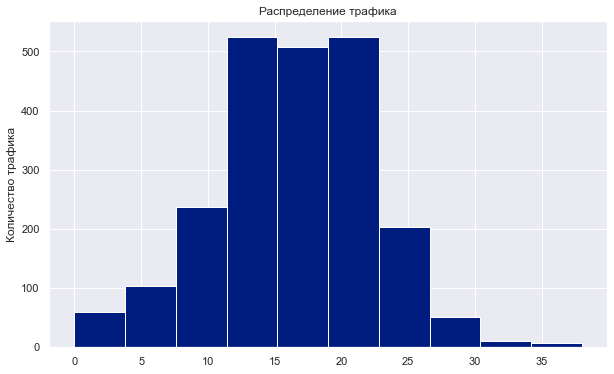

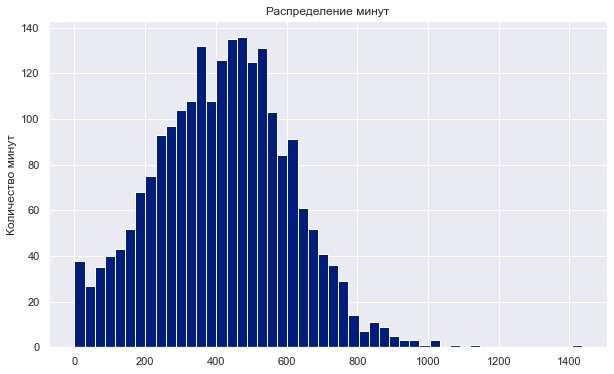

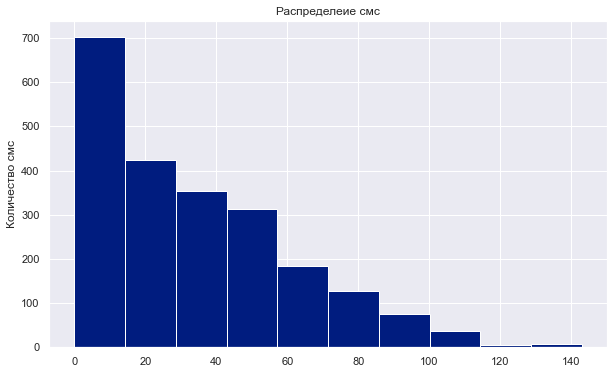

In [42]:
pivot_smart.hist(column='gb_used', bins=10, figsize=(10,6)) #Построим гистограмму для тарифа смарт
plt.title('Распределение трафика. Тариф Смарт')
plt.ylabel('Количество трафика')
plt.show()
pivot_smart.hist(column='sum_duration', bins=50, figsize=(10,6)) #Построим гистограмму для тарифа смарт
plt.title('Распределение минут. Тариф Смарт')
plt.ylabel('Количество минут')
plt.show()
pivot_smart.hist(column='message_by_month', bins=10, figsize=(10,6)) #Построим гистограмму для тарифа смарт
plt.title('Распределеие смс. Тариф Смарт')
plt.ylabel('Количество смс')
plt.show()

Оценив гистограммы тарифа Смарт, мы можем сделать следующий вывод. 
- Расход трафика распределен нормально
- Расход минут распреден нормально
- Смс распределены согласно распределению пуасонна, так как факт `смс отправлено` это биномиальное распределение.

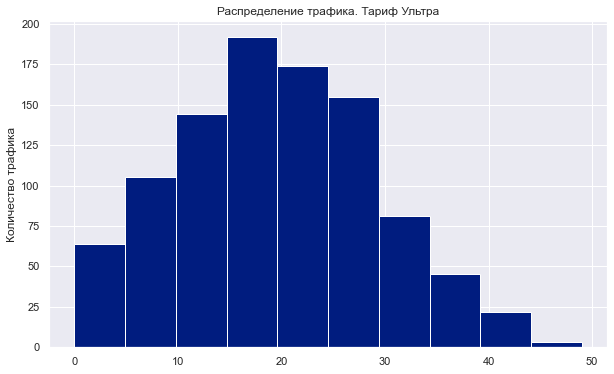

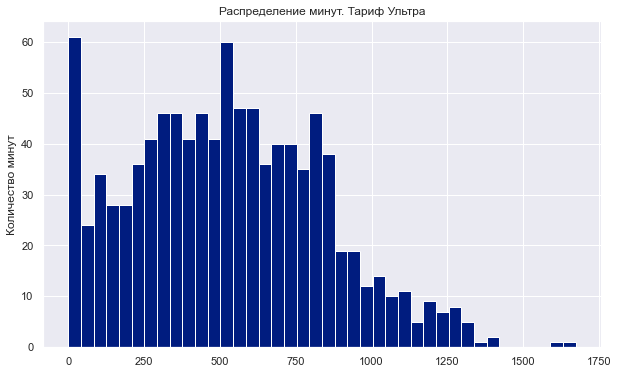

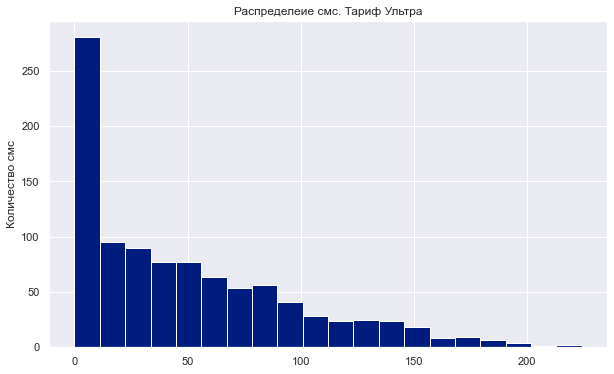

In [43]:
pivot_ultra.hist(column='gb_used', bins=10, figsize=(10,6)) #Построим гистограмму для тарифа ультра
plt.title('Распределение трафика. Тариф Ультра')
plt.ylabel('Количество трафика')
plt.show()
pivot_ultra.hist(column='sum_duration', bins=40, figsize=(10,6)) #Построим гистограмму для тарифа ультра
plt.title('Распределение минут. Тариф Ультра')
plt.ylabel('Количество минут')
plt.show()
pivot_ultra.hist(column='message_by_month', bins=20, figsize=(10,6)) #Построим гистограмму для тарифа ультра
plt.title('Распределеие смс. Тариф Ультра')
plt.ylabel('Количество смс')
plt.show()

Оценив гистограммы тарифа Ультра, мы можем сделать следующий вывод. 
- Расход трафика распределен нормально
- Расход минут распреден нормально, кроме большого числа звонков равных нулю. Это важная информация, так как 0 в звонке значит то, что неудалось соединиться и таких звонком много в тарифе Ультра. Возможно стоит детально погрузиться в то, что значит 0 в данном случае.
- Смс распределены согласно распределению пуасонна, так как факт `смс отправлено` это биномиальное распределение.

Расчитаем дисперсию и среднеквадратичное отклонение для каждого столбца в каждом тарифе

In [44]:
stat_smart = pd.DataFrame({'stat_smart':['variance', 'std'],
                           'income': [pivot_smart['income'].var(),  pivot_smart['income'].std()],
                           'traffic': [pivot_smart['gb_used'].var(), pivot_smart['gb_used'].std()],
                           'duration_calls': [pivot_smart['sum_duration'].var(), pivot_smart['sum_duration'].std()],
                           'messages': [pivot_smart['message_by_month'].var(), pivot_smart['message_by_month'].std()]
                            }).round(2) #Построим датафрейм для удобного отображения, где с помощью встроенных методов расчитаем дисперсию и отклонение
display(stat_smart)

,stat_smart,income,traffic,duration_calls,messages
0,variance,669785.71,33.03,36219.32,796.81
1,std,818.40,5.75,190.31,28.23


In [45]:
stat_ultra = pd.DataFrame({'stat_ultra':['variance', 'std'],
                           'income': [pivot_ultra['income'].var(),  pivot_ultra['income'].std()],
                           'traffic': [pivot_ultra['gb_used'].var(), pivot_ultra['gb_used'].std()],
                           'duration_calls': [pivot_ultra['sum_duration'].var(), pivot_ultra['sum_duration'].std()],
                           'messages': [pivot_ultra['message_by_month'].var(), pivot_ultra['message_by_month'].std()]
                            }).round(2)  #Построим датафрейм для удобного отображения, где с помощью встроенных методов расчитаем дисперсию и отклонение
display(stat_ultra)

,stat_ultra,income,traffic,duration_calls,messages
0,variance,141516.75,97.09,100873.63,2285.27
1,std,376.19,9.85,317.61,47.80


#### Вывод
Как мы видим у двух выборочных совокупностей дисперсии не равны, это нужно учесть для дальнейшей проверки гипотез.

### Общий вывод
Все столбцы распределены нормально, однако обратить внимание на большое число 0 в длительности звонка в тарифе Ультра.
Данный показатель может быть важен для оценки довольства и удержания доходных клиентов.
Дисперсии у данных выборок не равны, это значит что нужно учесть это при проведении t-теста

### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. 
**Нулевая гипотеза.** Средняя выручка пользователей тарифов Ультра и Смарт не различаются. Т.е генеральная совокупность тарифа Ультра равна генеральной совокупности Тарифа Смарт
- Данная гипотеза принята нулевой, для удоства проведения t теста о равенстве генеральных совокупностей

**Альтернативная гипотеза.** Средняя выручка пользователей тарифов Ультра и Смарт различаются. Т.е генеральная совокупность тарифа Ультра не равна генеральной совокупности Тарифа Смарт
- Мы приняли данную гипотезу за альтернативную, так как она является обратной для нашей гипотезы. Так как если оно будет принято верным, мы отбросим нулевую гипотезу.

Коэфф значимости мы примем за 5%

Стоит учитывать, что дисперии не равны, при проведении t теста о равенстве двух генеральных совокупностей.

In [46]:
alpha = 0.05 # Задаем коэфф значимости

results = st.ttest_ind(pivot_smart['income'], pivot_ultra['income'], equal_var = False) # Проводим t тест о равенстве генеральных совокупностей
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


#### Вывод

Мы отвегаем нулевую гипотезу, что означает, что мы считаем, что средняя выручка пользователей тарифов Ультра и Смарт различаются.

### Гипотеза: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Нулевая гипотеза.** Средняя выручка пользователей из Москвы и регионов не различаются. Т.е генеральная совокупность Москвы равна генеральной совокупности Регионов
- Данная гипотеза принята нулевой, для удоства проведения t теста о равенстве генеральных совокупностей

**Альтернативная гипотеза.** Средняя выручка пользователей из Москвы и регионов различаются. Т.е генеральная совокупность Москвы не равна генеральной совокупности Регионов
- Мы приняли данную гипотезу за альтернативную, так как она является обратной для нашей гипотезы. Так как если оно будет принято верным, мы отбросим нулевую гипотезу.

Коэфф значимости мы примем за 5%

Для начала нам нужно построить две выборки по городам.

In [48]:
users_calls_pivot_city = users_calls.groupby(['user_id','call_month','tariff','city']).sum() #Сгруппируем с указанием города
users_internet_pivot_city = users_internet.groupby(['user_id','session_month','tariff','city']).sum() #Сгруппируем с указанием города
users_messages_pivot_city = users_messages.groupby(['user_id','message_month','tariff','city']).count() #Сгруппируем с указанием города
final_pivot_city = users_internet_pivot_city.join(users_messages_pivot_city, on=['user_id','session_month','tariff','city'], how='left') #Объединим сгруппированные таблицы
final_pivot_city = final_pivot_city.join(users_calls_pivot_city, on=['user_id','session_month','tariff','city'], how='left') #Объединим сгруппированные таблицы
final_pivot_city['mb_used'] = np.ceil((final_pivot_city['mb_used'] / 1024)) #Переведем мб в гб и округлим вверх
final_pivot_city = final_pivot_city.fillna(0).rename(
    columns={'mb_used':'gb_used','message_date':'message_by_month','duration':'sum_duration'} #Переименуем стобцы для удобства
)
final_pivot_city = final_pivot_city.reset_index(level=['city','tariff','user_id']) #Оставим в индексе только месяца

final_pivot_city['income'] = final_pivot_city.apply(lambda x : user_income(x.tariff, x.gb_used, x.message_by_month, x.sum_duration),axis = 1) #Расчитаем доходность по месяцам по пользователю
pivot_moscow = final_pivot_city.loc[final_pivot_city['city'] == 'Москва'] #Создадим таблицу с абонентами из Москвы
pivot_other = final_pivot_city.loc[final_pivot_city['city'] != 'Москва'] #Создадим таблицу с абонентами из регионов

Отобразим полученные таблицы

In [49]:
display(pivot_moscow)
display(pivot_other)

,user_id,tariff,city,gb_used,message_by_month,sum_duration,income
session_month,,,,,,,
December,1001,smart,Москва,14.0,0.0,414.0,550.0
November,1001,smart,Москва,18.0,0.0,430.0,1150.0
August,1003,ultra,Москва,9.0,37.0,380.0,1950.0
December,1003,ultra,Москва,10.0,75.0,802.0,1950.0
November,1003,ultra,Москва,12.0,94.0,824.0,1950.0
...,...,...,...,...,...,...,...
June,1490,smart,Москва,20.0,50.0,330.0,1550.0
May,1490,smart,Москва,21.0,37.0,339.0,1750.0
November,1490,smart,Москва,19.0,47.0,282.0,1350.0


,user_id,tariff,city,gb_used,message_by_month,sum_duration,income
session_month,,,,,,,
August,1000,ultra,Краснодар,14.0,81.0,408.0,1950.0
December,1000,ultra,Краснодар,10.0,70.0,333.0,1950.0
July,1000,ultra,Краснодар,14.0,75.0,340.0,1950.0
June,1000,ultra,Краснодар,23.0,60.0,172.0,1950.0
May,1000,ultra,Краснодар,3.0,22.0,159.0,1950.0
...,...,...,...,...,...,...,...
September,1498,smart,Владикавказ,22.0,44.0,471.0,1950.0
December,1499,smart,Пермь,13.0,66.0,492.0,598.0
November,1499,smart,Пермь,18.0,59.0,612.0,1513.0


Для проведения теста мы не будем считать дисперсии так как и так можно увидеть, что выборки отличаются по размеру друг от друга, а значит мы считаем, что дисперсии разные.

In [50]:
alpha = 0.05

results = st.ttest_ind(pivot_moscow['income'], pivot_other['income'], equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5023167352991608
Не получилось отвергнуть нулевую гипотезу


#### Вывод
Мы не отвергаем нулевую гипотезу, что означает, что мы принимаем, что выручка не отличается в зависимости от региона

#### Финальные расчеты

На основе проверки гипотез мы можем сделать два вывода, выручка тарифов не зависит от региона и выручка между тарифами различается.

Исходя из этого, для ответа на главный вопрос проекта, мы проверим:

1. Скорость ежемесячного оттока в зависимости от тарифа
2. Доходность от тарифов накопительным итогом 
3. Скорость оттока в целом




Число абонентов тарифа Смарт 351
Число абонентов тарифа Ультра 149


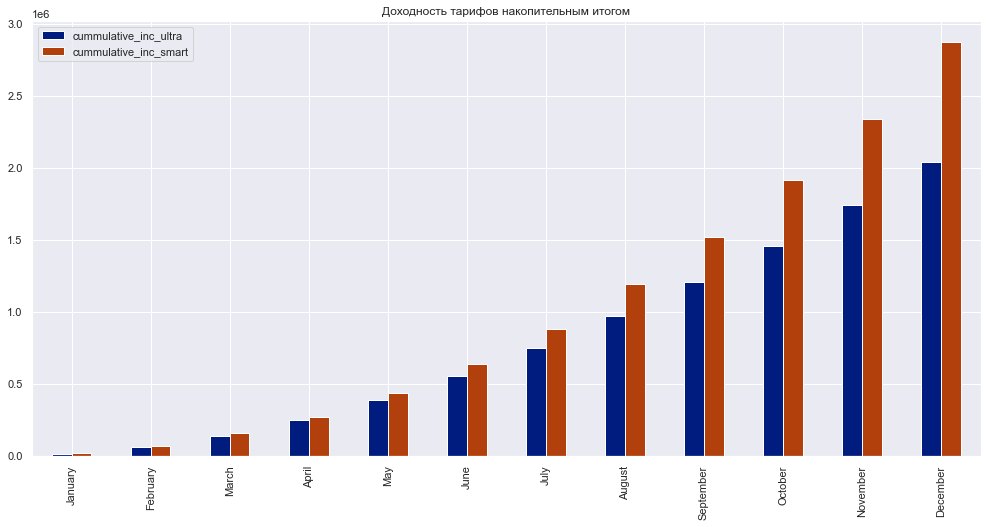

In [51]:
pivot_smart_by_month_sum = pivot_smart.groupby('session_month').sum() #Сгруппируем по месяцу и расчитаем среднее
pivot_smart_by_month_sum.index = pd.Categorical(pivot_smart_by_month_sum.index, categories=months, ordered=True) #В индексе сделаем категоральное значение в определенным порядком
pivot_smart_by_month_sum = pivot_smart_by_month_sum.sort_index() #Отсортируем индекс
pivot_smart_by_month_sum['cummulative_inc'] = pivot_smart_by_month_sum['income'].cumsum() #Создадим столбец с накопительным итогом
pivot_ultra_by_month_sum = pivot_ultra.groupby('session_month').sum() #Сгруппируем по месяцу и расчитаем среднее
pivot_ultra_by_month_sum.index = pd.Categorical(pivot_ultra_by_month_sum.index, categories=months, ordered=True) #В индексе сделаем категоральное значение в определенным порядком
pivot_ultra_by_month_sum = pivot_ultra_by_month_sum.sort_index() #Отсортируем индекс
pivot_ultra_by_month_sum['cummulative_inc_ultra'] = pivot_ultra_by_month_sum['income'].cumsum() #Создадим столбец с накопительным итогом
pivot_ultra_by_month_sum['cummulative_inc_smart'] = pivot_smart_by_month_sum['cummulative_inc'] #Для наглядности графика добавим новый столбец
pivot_ultra_by_month_sum.plot.bar(y=['cummulative_inc_ultra','cummulative_inc_smart'], title='Доходность тарифов накопительным итогом', grid=True) #Построим график
print('Число абонентов тарифа Смарт', len(users.query('tariff == "smart"')))
print('Число абонентов тарифа Ультра', len(users.query('tariff == "ultra"')))

Мы можем сделать вывод, что тариф ультра более доходный так как при вдвое меньшем числе абонентов, доходность незначительно меньше.

In [52]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y%m%dT') #Приведем дату к нужному типу
users['churn_month'] = users['churn_date'].dt.month_name() #Создадим столбец с названиями месяцевв
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y%m%dT') #Приведем дату к нужному типу
users['reg_month'] = users['reg_date'].dt.month_name() #Создадим столбец с названиями месяцевв
users['reg_month'] = pd.Categorical(users['reg_month'], categories=months, ordered=True) #Cделаем категоральное значение c определенным порядком
users['churn_month'] = pd.Categorical(users['churn_month'], categories=months, ordered=True)#Cделаем категоральное значение c определенным порядком
users = users.sort_values(by=['reg_month','churn_month']) #Отсортируем в соотвествии с порядком

In [53]:
influx_by_month = users.groupby('reg_month').agg('user_id').count() #Посчитаем месячный приток 
outflow_by_month = users.groupby('churn_month').agg('user_id').count() #Посчитаем месячный отток 
display(pd.concat([influx_by_month, outflow_by_month], axis=1))

,user_id,user_id
January,43,0
February,39,0
March,32,0
April,53,0
May,41,0
June,40,0
July,44,0
August,50,2
September,35,3
October,45,9


Отток к концу года растет, как растет и количество абонентов.

In [54]:
influx_by_month_smart = users.groupby(['reg_month','tariff']).count().query("tariff=='smart'")['user_id'].rename('in_smart')
influx_by_month_ultra = users.groupby(['reg_month','tariff']).count().query("tariff=='ultra'")['user_id'].rename('in_ultra')

In [55]:
outflow_by_month_smart = users.groupby(['churn_month','tariff']).count().query("tariff=='smart'")['user_id'].rename('out_smart')
outflow_by_month_ultra = users.groupby(['churn_month','tariff']).count().query("tariff=='ultra'")['user_id'].rename('out_ultra')

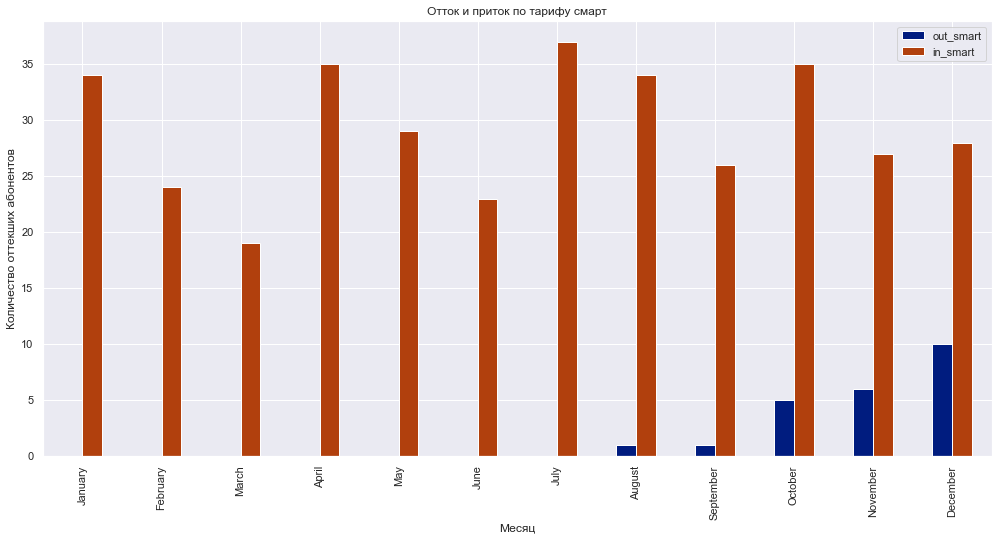

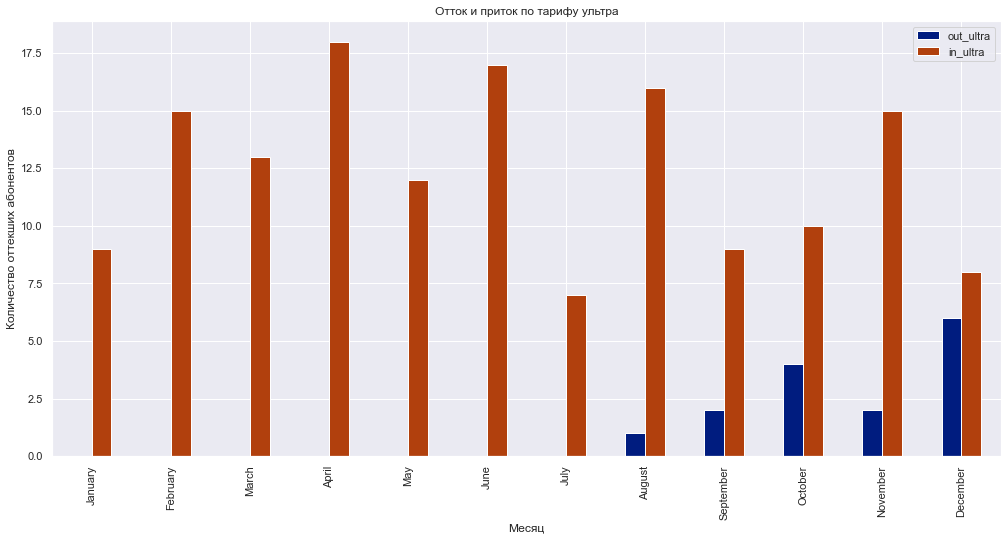

In [59]:
(
    pd.concat([outflow_by_month_smart,influx_by_month_smart],axis=1).reset_index(level='tariff', drop=True)
    .plot.bar(y=['out_smart','in_smart'],title='Отток и приток по тарифу смарт')
)
plt.ylabel('Количество оттекших абонентов')
plt.xlabel('Месяц')

(
    pd.concat([outflow_by_month_ultra,influx_by_month_ultra],axis=1).reset_index(level='tariff', drop=True)
    .plot.bar(y=['out_ultra','in_ultra'],title='Отток и приток по тарифу ультра')
)
plt.ylabel('Количество оттекших абонентов')
plt.xlabel('Месяц')
plt.show()

Так мы можем увидеть что отток в обоих тарифах практически не отличается, однако для удобства лучше посмотрим на графики с накопительным итогом

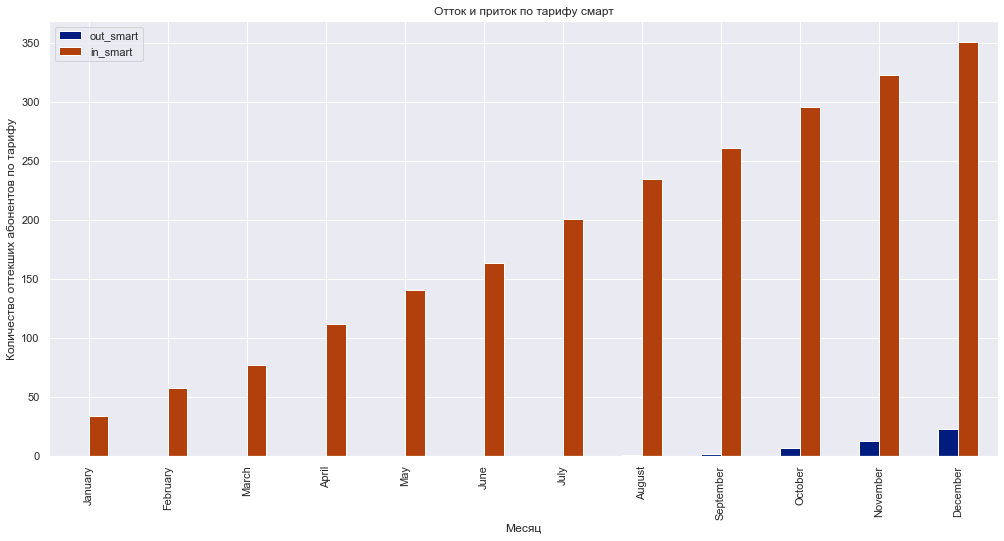

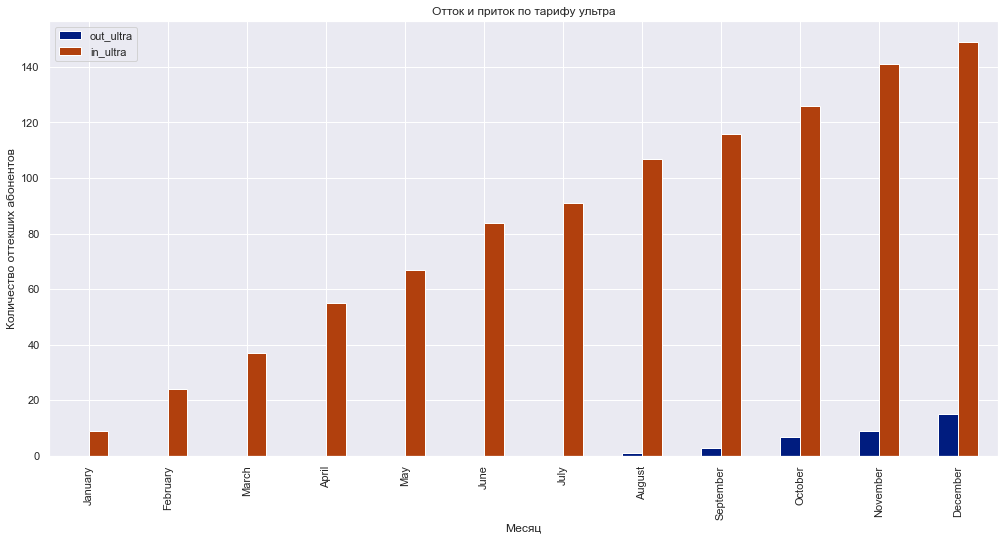

In [61]:
(
    pd.concat([outflow_by_month_smart.cumsum(),influx_by_month_smart.cumsum()],axis=1).reset_index(level='tariff', drop=True)
    .plot.bar(y=['out_smart','in_smart'],title='Отток и приток по тарифу смарт')
)
plt.ylabel('Количество оттекших абонентов по тарифу')
plt.xlabel('Месяц')
(
    pd.concat([outflow_by_month_ultra.cumsum(),influx_by_month_ultra.cumsum()],axis=1).reset_index(level='tariff', drop=True)
    .plot.bar(y=['out_ultra','in_ultra'],title='Отток и приток по тарифу ультра')
)
plt.ylabel('Количество оттекших абонентов')
plt.xlabel('Месяц')
plt.show()

Мы можем сделать вывод, что тариф Ультра рискованный с точки зрения оттока, чем тариф Смарт.

### Общий Вывод

Наибольшая активность пользователя тарифа смарт в декабре, что логично, так как ищутся подарки, места для празднования, ищутся видеорецепты, множество звонков и смс в которых люди планируют то, как будут проводить новый год и январские праздники.

Наименьшая активность в январе. Это связанно с тем, что люди отдыхают от посленовогодней суеты, чаще общаются в живую на праздниках. Деловая активность в январе так же снижена. Февраль так же месяц слабый по активности, это связано с тем, что активность пользователей только начинает восстанавливаться после января. 

Мы можем сделать вывод, что наименьшая активность пользователей тарифа Ультра в феврале, а наибольшая в декабре.
Как было сказано для тарифа Смарт, повышенная активность декабря связанна с предновогодней суетой, планированием, подбором подарков, повышенной деловой активностью.

Однако как можно заметить, различие с тарифом Смарт состоит в том, что у пользователей Ультра большее падение наблюдается в феврале, а не январе.
Необходимо поднимать ЦА по тарифам, чтобы сделать правильный вывод касательно данного факта.

Все столбцы распределены нормально, однако обратить внимание на большое число 0 в длительности звонка в тарифе Ультра.
Данный показатель может быть важен для оценки довольства и удержания доходных клиентов.

**Нами было выдвинуто 2 гипотезы:**

**Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.**
- Мы не отвергаем данную гипотезу.

**Гипотеза: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**
- Мы отвергаем данную гипотезу.

**Касательно главной нашей задачи.**

Проанализировав приток польователей и доходность тарифа Cмарт и Ультра, мы можем сделать следующий вывод.

   - Тариф Смарт характеризуется большим приростом абонентов, а так же меньшим оттоком. При этом тариф Смарт за счет распространенности приносит больше денег компании за счет количества абонентов.

   - Однако тариф Ультра несмотря на меньшую распространенность, приносит сравнительное с тарифом Смарт количество выручки, однако характеризуется большим оттоком. Более того, что несмотря на меньший размер клиентской базы (более чем в 2 раза), тариф Ультра покажет намного большую выручку при таком же объеме абонентов.

   - При планировании рекламных компаний нужно обратить внимание, что наибольшим приток новых абонентов тарифа Ультра произошел в Апреле, Июне, Августе и Ноябре.

   - Для рекламных компаний делать упор на тариф Ультра, взяв во внимание растущий отток клиентов.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыты файлы
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  таблицы объеденены по общему ключу
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  составлена сводная таблица где для пользователя указано 
    количество сделанных звонков и израсходованных минут разговора по месяцам;
    количество отправленных сообщений по месяцам;
    объем израсходованного интернет-трафика по месяцам;
    помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
- [x]  для тарифа смарт расчитать: Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям тарифа в месяц
- [x]  для тарифа ультра расчитать: Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям тарифа в месяц
- [x]  для тарифа смарт: Построить гистограммы, описать распределение, расчитать дисперсию и среднеквадратичное отклонение
- [x]  для тарифа ультра: Построить гистограммы, описать распределение, расчитать дисперсию и среднеквадратичное отклонение
- [x]  проверить гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- [x]  проверить гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
- [x]  пояснить: как вы формулировали нулевую и альтернативную гипотезы;
- [x]  какой критерий использовали для проверки гипотез и почему.
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод